# One-Dimensional Climate Models: Brown Dwarfs w/ Chemical Equilibrium and Resort-Rebin

In this tutorial you will learn how to run 1d climate models with chemical equilibrium but using resort rebin instead of the pre-weighted chemeq tables.


What you should already be familiar with:

- [basics of running/analyzing thermal spectra](https://natashabatalha.github.io/picaso/tutorials.html#basics-of-thermal-emission)
- [how to analyze thermal emission spectra](https://natashabatalha.github.io/picaso/notebooks/workshops/ERS2021/ThermalEmissionTutorial.html)
- [how to run a basic 1d brown dwarf tutorial](https://natashabatalha.github.io/picaso/notebooks/climate/12a_BrownDwarf.html)

What you should have downloaded:

Use the `data.get_data` helper function to get resortrebin files and add them to the default picaso location: `reference/opaities/resortrebin`
 >> import picaso.data as d

 >>d.get_data(category_download='ck_tables',target_download='by-molecule')

You should also already have the bobcat structure files:

 >>d.get_data(category_download='sonora_grids',target_download='bobcat')


In [1]:
import os
import warnings
warnings.filterwarnings('ignore')
import picaso.justdoit as jdi
import picaso.justplotit as jpi
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
#%matplotlib inline
from astropy import constants as const
from astropy import units as u
import sys
import pandas as pd

## Setting up Initial Run (highlighting main differences for resort-rebin)

In this case because we're mixing the gases on the fly, we don't need to define the correlated-k database/file. As you can see here in opannection, the method is now set to `resortrebin`. We've defined a list of gases to mix here but if you don't define anything all gasses will be mixed. For more information about the difference between these two methods, you can look at the [Fun with Chem notebook]()

In [2]:
sonora_profile_db = os.path.join(os.getenv('picaso_refdata'),'sonora_grids','bobcat')

gases_fly = ['CO','CH4','H2O','NH3','CO2','N2','HCN','H2','He','PH3','C2H2','Na','K','TiO','VO','FeH']

#change opacity connection
opacity_ck = jdi.opannection(method='resortrebin',preload_gases=gases_fly) # grab your opacities

In [3]:
cl_run = jdi.inputs(calculation="browndwarf", climate = True) # start a calculation


tint= 700
grav = 316 # Gravity of your Planet in m/s/s

cl_run.gravity(gravity=grav, gravity_unit=u.Unit('m/(s**2)')) # input gravity
cl_run.effective_temp(tint) # input effective temperature

nlevel = 91

We recommend starting with Sonora-Bobcat models as an initial guess.

In [4]:
pressure,temp_guess = np.loadtxt(jdi.os.path.join(
                            sonora_profile_db,f"t{tint}g{grav}nc_m0.0.cmp.gz"),
                            usecols=[1,2],unpack=True, skiprows = 1)

rcb_guess = 79 # top most level of guessed convective zone

# Here are some other parameters needed for the code.
rfacv = 0.0 #we are focused on a brown dwarf so let's keep this as is

In comparison to when running climate models with the preweighted ck tables, those we already defined the metallicity and C/O ratio in the format of the table files. Here since we're not using those tables, we need to define the metallicity and C/O ratio along with the type of chemistry we want to do.

**New Parameters**

`mh` : this is the metallicity **relative** to solar

`cto_relative` : C/O **relative** to solar OR `cto_absolute` which makes it the actual C/O value

`chem_method` : This will tell PICASO what kind of chemistry you want. The 3 options are `visscher`, `visscher_1060`, and `photochem`.

The difference between `visscher` and `visscher_1060` are the grid points used with `visscher` having the most updated chemistry as well. We will get into `photochem` in another notebook doing photochemistry.

You **MUST** include the `mh` and one of the `cto...` inputs when doing the `visscher` and `visscher_1060` method.

In [5]:
cl_run.inputs_climate(temp_guess= temp_guess, pressure= pressure,
                        rcb_guess=rcb_guess, rfacv = rfacv)

mh=1
cto_relative = 1

#now that we are not using preweighted ck tables we need to tell picaso how to compute chemistry on the fly
cl_run.atmosphere(mh=mh, cto_relative=cto_relative, chem_method='visscher')

In [6]:
out = cl_run.climate(opacity_ck, save_all_profiles = True, with_spec=True)

SUMMARY
-------
Clouds: False
quench False
cold_trap False
vol_rainout False
no_ph3 False
Moist Adiabat: False


Iteration number  0 , min , max temp  234.96617322894122 2711.315678240838 , flux balance  -0.12102108709716844
Iteration number  1 , min , max temp  238.69804929981 2717.9216112160043 , flux balance  -0.09487061367453709


Iteration number  2 , min , max temp  242.31374315698392 2724.668363204319 , flux balance  -0.06781179874547417
Iteration number  3 , min , max temp  245.82880696760208 2731.5608482782645 , flux balance  -0.03982109301002183
Iteration number  4 , min , max temp  249.25764558360368 2738.6062015381285 , flux balance  -0.010876612535028158
Iteration number  5 , min , max temp  250.49053564306288 2741.2604724750377 , flux balance  -2.2150156500146494e-05
In t_start: Converged Solution in iterations  5
Big iteration is  250.49053564306288 0


 We are already at a root, tolf , test =  5e-05 ,  2.2150156500146494e-05
Profile converged before itmx


Iteration number  0 , min , max temp  252.62572334306927 2740.9341961939303 , flux balance  0.00014408612703621347
Iteration number  1 , min , max temp  252.63897068753067 2740.933047450133 , flux balance  1.1025121975810279e-06
In t_start: Converged Solution in iterations  1
Big iteration is  252.63897068753067 0


 We are already at a root, tolf , test =  5e-05 ,  3.2886132990402834e-06
Profile converged before itmx


 convection zone status
0 79 89 0 0 0
1
[0, 63, 63, 63, 79, 89]


Iteration number  0 , min , max temp  253.12083465646742 2741.0455272195354 , flux balance  -1.2132468689520303e-05
In t_start: Converged Solution in iterations  0
Big iteration is  253.12083465646742 0


Iteration number  0 , min , max temp  253.12874798661045 2741.0459518989433 , flux balance  -9.490223123813534e-08
In t_start: Converged Solution in iterations  0
Profile converged before itmx
Grow Phase : Upper Zone
[0, 62, 63, 63, 79, 89]


Iteration number  0 , min , max temp  253.2496608116602 2740.9969558878283 , flux balance  2.2314463196910543e-06
Iteration number  1 , min , max temp  253.2516998019538 2740.9968255660992 , flux balance  2.0826223368470882e-08
In t_start: Converged Solution in iterations  1
Big iteration is  253.2516998019538 0


 We are already at a root, tolf , test =  5e-05 ,  6.473294336799259e-07
Profile converged before itmx
[0, 62, 64, 64, 79, 89]


Iteration number  0 , min , max temp  253.31795262206617 2740.92949431593 , flux balance  -2.195976979717528e-06
In t_start: Converged Solution in iterations  0
Big iteration is  253.31795262206617 0


Iteration number  0 , min , max temp  253.31887808965556 2740.92910364333 , flux balance  -1.1606803889961518e-08
In t_start: Converged Solution in iterations  0
Profile converged before itmx
[0, 61, 64, 64, 79, 89]


Iteration number  0 , min , max temp  253.37315886146618 2740.8634199001303 , flux balance  -1.914805061058287e-06
In t_start: Converged Solution in iterations  0
Big iteration is  253.37315886146618 0


Iteration number  0 , min , max temp  253.374012102053 2740.8627534233087 , flux balance  -1.3081385687866023e-08
In t_start: Converged Solution in iterations  0
Profile converged before itmx
[0, 61, 65, 65, 79, 89]


Iteration number  0 , min , max temp  253.43625550700293 2740.8075991312853 , flux balance  -8.034560137674328e-06
In t_start: Converged Solution in iterations  0
Big iteration is  253.43625550700293 0


Iteration number  0 , min , max temp  253.43724614931037 2740.806935469116 , flux balance  -8.236289791437821e-08
In t_start: Converged Solution in iterations  0
Profile converged before itmx
[0, 60, 65, 65, 79, 89]


Iteration number  0 , min , max temp  253.4867455422823 2740.7566617774396 , flux balance  -1.6859290855046488e-05
In t_start: Converged Solution in iterations  0
Big iteration is  253.4867455422823 0


Iteration number  0 , min , max temp  253.48782260505098 2740.755336499341 , flux balance  -2.1035037479884676e-07
In t_start: Converged Solution in iterations  0
Profile converged before itmx
[0, 59, 65, 65, 79, 89]


Iteration number  0 , min , max temp  253.5230650010696 2740.7709966684442 , flux balance  -1.133164376910837e-05
In t_start: Converged Solution in iterations  0
Big iteration is  253.5230650010696 0


Iteration number  0 , min , max temp  253.5238095982639 2740.7705784741806 , flux balance  -1.5207596474940572e-07
In t_start: Converged Solution in iterations  0
Profile converged before itmx
[0, 59, 66, 66, 79, 89]


Iteration number  0 , min , max temp  253.53847887264322 2740.7808808272594 , flux balance  2.617332149490844e-05
Iteration number  1 , min , max temp  253.53843650379483 2740.781492314242 , flux balance  2.875172098394905e-07
In t_start: Converged Solution in iterations  1
Big iteration is  253.53843650379483 0


 We are already at a root, tolf , test =  5e-05 ,  2.3910132164612816e-06
Profile converged before itmx
final [0, 59, 66, 66, 79, 89]


Iteration number  0 , min , max temp  253.54134683822042 2740.778036100137 , flux balance  2.6826400765563947e-05
Iteration number  1 , min , max temp  253.5410411228989 2740.7786079774905 , flux balance  2.9553440603505207e-07
In t_start: Converged Solution in iterations  1
Big iteration is  253.5410411228989 0


 We are already at a root, tolf , test =  5e-05 ,  2.3858857666450026e-06
Profile converged before itmx
YAY ! ENDING WITH CONVERGENCE


## Compare Resort-rebin and Pre-weighted CK table derived Climate Profiles

Now we can compare how these two methods perform against one another

Text(0.5, 0, 'Temperature [K]')

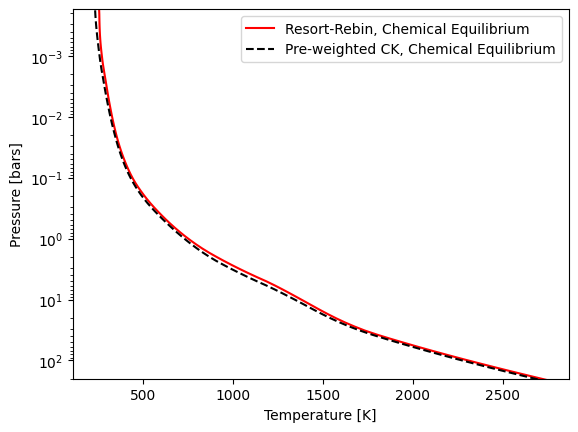

In [7]:
plt.ylim(200,1.7e-4)
plt.semilogy(out['temperature'],out['pressure'],"r", label='Resort-Rebin, Chemical Equilibrium')
plt.semilogy(temp_guess,pressure,color="k",linestyle="--", label='Pre-weighted CK, Chemical Equilibrium')
plt.legend()
plt.ylabel('Pressure [bars]')
plt.xlabel('Temperature [K]')